In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def meandr(time_impulse, time_model, time_step):
    x = np.arange(0, time_model-time_step, time_step)
    num_points = len(x)
    trig = False
    y = [0] * num_points
    z = [0]
    k = 0
    for i in range(num_points):
        if k == time_impulse:
            trig = not trig
            z.append(x[i])
            k = 0
        if not trig:
            y[i] = 0
        else:
            y[i] = 1
        k += 1
    return x, y, z

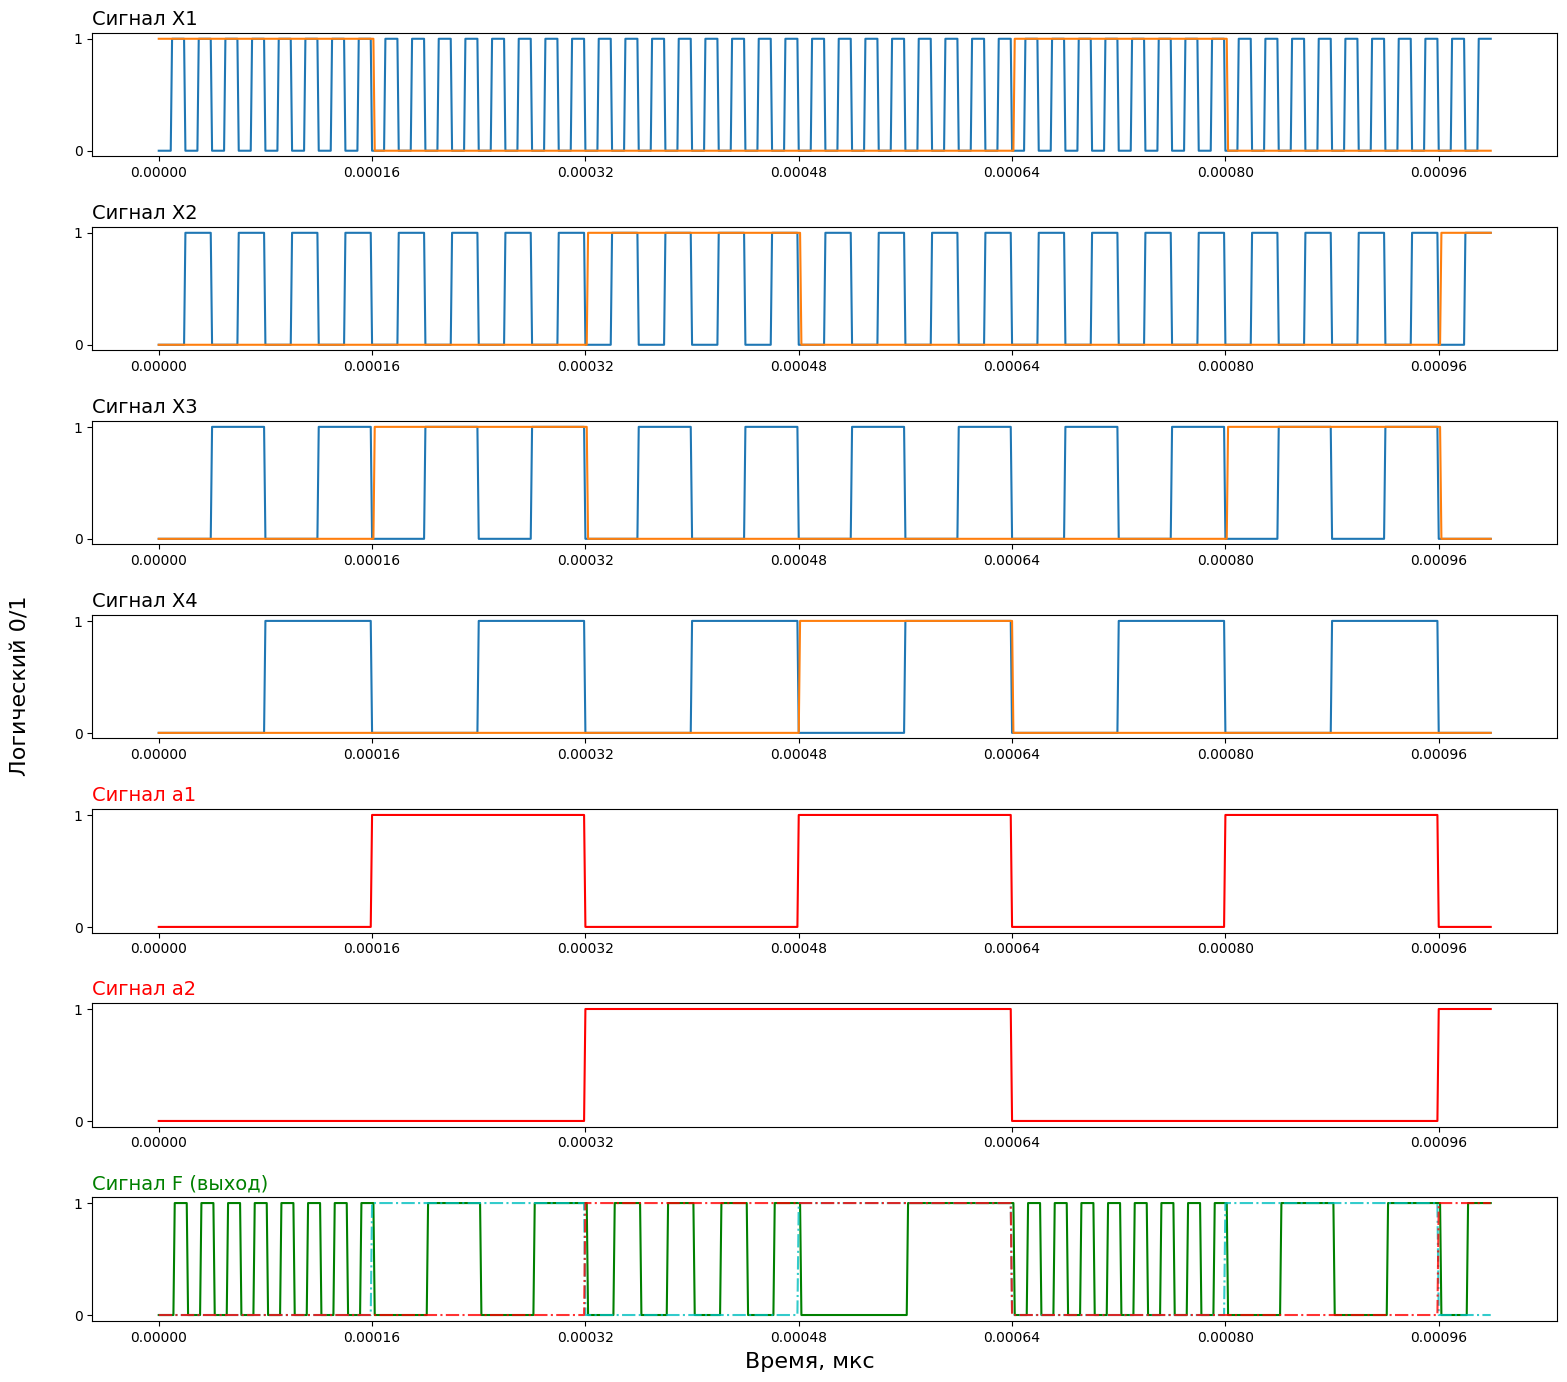

In [5]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(7, figsize=(16,14), sharex=False, sharey=True)
fig.tight_layout(pad=3.0)
fig.supylabel('Логический 0/1', x=0, fontsize=16)
fig.supxlabel('Время, мкс', fontsize=16)

plt.yticks([0,1])

x1, y1, z1 = meandr(10, 0.001, 0.000001)
x2, y2, z2 = meandr(20, 0.001, 0.000001)
x3, y3, z3 = meandr(40, 0.001, 0.000001)
x4, y4, z4 = meandr(80, 0.001, 0.000001)
x5, y5, z5 = meandr(160, 0.001, 0.000001)
x6, y6, z6 = meandr(320, 0.001, 0.000001)

ey1 = list((np.ones(len(y5)) - np.array(y5)) * (np.ones(len(y6)) - np.array(y6)))
ey1 = ey1[:2] + ey1[:-2]
ey2 = list((np.ones(len(y5)) - np.array(y5)) * (np.array(y6)))
ey2 = ey2[:2] + ey2[:-2]
ey3 = list(np.array(y5) * (np.ones(len(y6)) - np.array(y6)))
ey3 = ey3[:2] + ey3[:-2]
ey4 = list(np.array(y5) * np.array(y6))
ey4 = ey4[:1] + ey4[:-1]

f = list((np.array(ey1) * np.array(y1)) + (np.array(ey2) * np.array(y2)) + (np.array(ey3) * np.array(y3)) + (np.array(ey4) * np.array(y4)))
f = f[:2] + f[:-2]

ax1.set_title("Сигнал X1", fontdict={'fontsize': 14, 'color': 'black'}, loc='left')
ax1.set_xticks(z5)
ax1.plot(x1, y1)
ax1.plot(x1, ey1)

ax2.set_title("Сигнал X2", fontdict={'fontsize': 14, 'color': 'black'}, loc='left')
ax2.set_xticks(z5)
ax2.plot(x2, y2)
ax2.plot(x2, ey2)

ax3.set_title("Сигнал X3", fontdict={'fontsize': 14, 'color': 'black'}, loc='left')
ax3.set_xticks(z5)
ax3.plot(x3, y3)
ax3.plot(x3, ey3)

ax4.set_title("Сигнал X4", fontdict={'fontsize': 14, 'color': 'black'}, loc='left')
ax4.set_xticks(z5)
ax4.plot(x4, y4)
ax4.plot(x4, ey4)

ax5.set_title("Сигнал a1", fontdict={'fontsize': 14, 'color': 'red'}, loc='left')
ax5.set_xticks(z5)
ax5.plot(x5, y5, '-r')

ax6.set_title("Сигнал a2", fontdict={'fontsize': 14, 'color': 'red'}, loc='left')
ax6.set_xticks(z6)
ax6.plot(x6, y6, '-r')

ax7.set_title("Сигнал F (выход)", fontdict={'fontsize': 14, 'color': 'green'}, loc='left')
ax7.set_xticks(z5)
ax7.plot(x6, f, '-g')
ax7.plot(x6, y5, '-.c', alpha=0.8)
ax7.plot(x6, y6, '-.r', alpha=0.8)

plt.show()